# OOP Case Study: Backtest Framework

Implement strategy using OOP.

## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = (12,7.5)

%load_ext autoreload
%autoreload 2

In [2]:
import apogeebacktest
from apogeebacktest.strategies import MarketStrategy
from apogeebacktest.strategies import BestBPStrategy, WorstBPStrategy, LongShortBPStrategy

## Implement Strategy

### Compute equally-weighted market portfolio for reference

In [3]:
market_strategy = MarketStrategy()
mk_dates, mk_mth_returns, mk_mth_log_returns = market_strategy.evalStrategy()
for i, (date_eval_portfolio, mk_mth_return, mk_mth_log_return) in enumerate(zip(mk_dates, mk_mth_returns, mk_mth_log_returns)):
    print(f'{i:3d} | Portfolio evaluated on {date_eval_portfolio}. Return: {mk_mth_return:+.4f} | Log Return: {mk_mth_log_return:+.4f}')

  0 | Portfolio evaluated on 19991231. Return: +0.0727 | Log Return: +0.0702
  1 | Portfolio evaluated on 20000131. Return: -0.0055 | Log Return: -0.0055
  2 | Portfolio evaluated on 20000229. Return: +0.0485 | Log Return: +0.0474
  3 | Portfolio evaluated on 20000331. Return: +0.0993 | Log Return: +0.0947
  4 | Portfolio evaluated on 20000430. Return: +0.0502 | Log Return: +0.0489
  5 | Portfolio evaluated on 20000531. Return: -0.0100 | Log Return: -0.0101
  6 | Portfolio evaluated on 20000630. Return: -0.0110 | Log Return: -0.0111
  7 | Portfolio evaluated on 20000731. Return: +0.0498 | Log Return: +0.0486
  8 | Portfolio evaluated on 20000831. Return: +0.1250 | Log Return: +0.1177
  9 | Portfolio evaluated on 20000930. Return: +0.0024 | Log Return: +0.0024
 10 | Portfolio evaluated on 20001031. Return: +0.0473 | Log Return: +0.0462
 11 | Portfolio evaluated on 20001130. Return: -0.0723 | Log Return: -0.0750
 12 | Portfolio evaluated on 20001231. Return: +0.0085 | Log Return: +0.0085

### Compute equally-weighted long-short book-price-ratio strategy

In [4]:
ls_bp_strategy = LongShortBPStrategy()
ls_dates, ls_mth_returns, ls_mth_log_returns = ls_bp_strategy.evalStrategy()
for i, (date_eval_portfolio, ls_mth_return, ls_mth_log_return) in enumerate(zip(ls_dates, ls_mth_returns, ls_mth_log_returns)):
    print(f'{i:3d} | Portfolio evaluated on {date_eval_portfolio}. Return: {ls_mth_return:+.4f} | Log Return: {ls_mth_log_return:+.4f}')

  0 | Portfolio evaluated on 20000131. Return: -0.0248 | Log Return: -0.0251
  1 | Portfolio evaluated on 20000229. Return: -0.3363 | Log Return: -0.4099
  2 | Portfolio evaluated on 20000331. Return: +0.1605 | Log Return: +0.1488
  3 | Portfolio evaluated on 20000430. Return: +0.1233 | Log Return: +0.1163
  4 | Portfolio evaluated on 20000531. Return: +0.1169 | Log Return: +0.1105
  5 | Portfolio evaluated on 20000630. Return: -0.1630 | Log Return: -0.1779
  6 | Portfolio evaluated on 20000731. Return: +0.1139 | Log Return: +0.1079
  7 | Portfolio evaluated on 20000831. Return: -0.0702 | Log Return: -0.0728
  8 | Portfolio evaluated on 20000930. Return: +0.0546 | Log Return: +0.0532
  9 | Portfolio evaluated on 20001031. Return: +0.0631 | Log Return: +0.0612
 10 | Portfolio evaluated on 20001130. Return: +0.0982 | Log Return: +0.0937
 11 | Portfolio evaluated on 20001231. Return: +0.0646 | Log Return: +0.0626
 12 | Portfolio evaluated on 20010131. Return: +0.0736 | Log Return: +0.0710

In [5]:
be_bp_strategy = BestBPStrategy()
be_dates, be_mth_returns, be_mth_log_returns = be_bp_strategy.evalStrategy()
wo_bp_strategy = WorstBPStrategy()
wo_dates, wo_mth_returns, wo_mth_log_returns = wo_bp_strategy.evalStrategy()

## Evaluate results

Plots are also implemented in the `plot_performance` method in `apogeebacktest.utils.plots`.

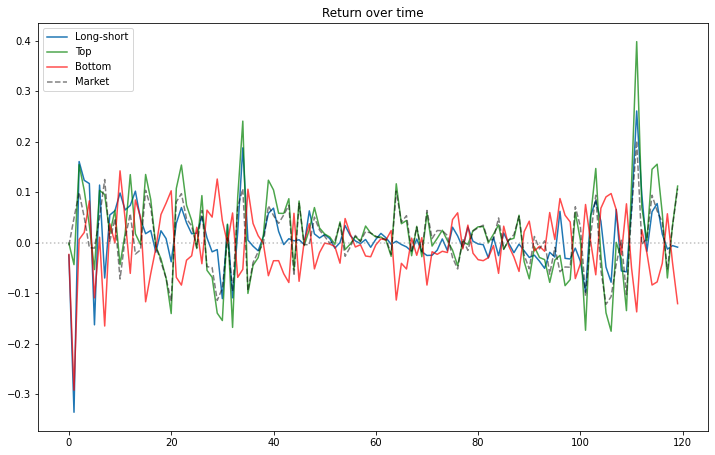

In [6]:
plt.title('Return over time')
plt.plot(ls_mth_returns, label='Long-short')
plt.plot(be_mth_returns, c='g', alpha=0.7, label='Top')
plt.plot(wo_mth_returns, c='r', alpha=0.7, label='Bottom')
plt.plot(mk_mth_returns[1:], ls='--', c='black', alpha=0.5, label='Market')
plt.axhline(0, ls='dotted', c='gray', alpha=0.5)
plt.legend()
plt.show()

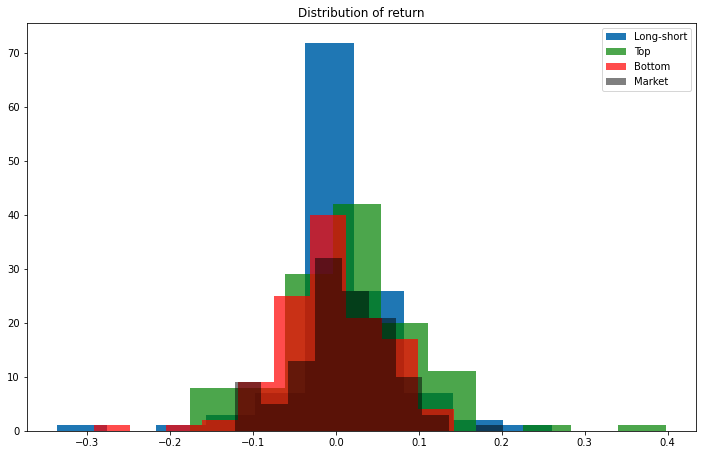

In [7]:
plt.title('Distribution of return')
plt.hist(ls_mth_returns, label='Long-short')
plt.hist(be_mth_returns, color='g', alpha=0.7, label='Top')
plt.hist(wo_mth_returns, color='r', alpha=0.7, label='Bottom')
plt.hist(mk_mth_returns[1:], ls='--', color='black', alpha=0.5, label='Market')
plt.legend()
plt.show()

In [8]:
print('Average monthly log returns')
print(f'Market portfolio     : {np.mean(mk_mth_log_returns[1:]):.6f}')
print(f'Long-short portfolio : {np.mean(ls_mth_log_returns):.6f}')
print(f'Top portfolio        : {np.mean(be_mth_log_returns):.6f}')
print(f'Bottom portfolio     : {np.mean(wo_mth_log_returns):.6f}')
# Magnitude differs because we shorted it! Can't just add a negative sign for log returns!

Average monthly log returns
Market portfolio     : 0.007157
Long-short portfolio : 0.006820
Top portfolio        : 0.012083
Bottom portfolio     : -0.008590


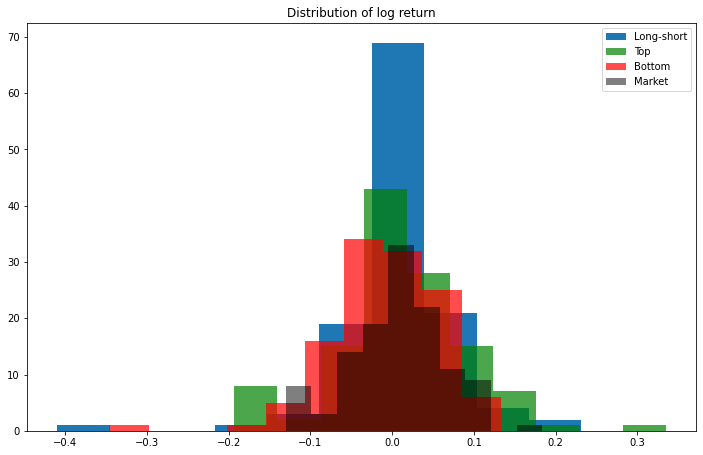

In [9]:
plt.title('Distribution of log return')
plt.hist(ls_mth_log_returns, label='Long-short')
plt.hist(be_mth_log_returns, color='g', alpha=0.7, label='Top')
plt.hist(wo_mth_log_returns, color='r', alpha=0.7, label='Bottom')
plt.hist(mk_mth_log_returns[1:], ls='--', color='black', alpha=0.5, label='Market')
plt.legend()
plt.show()

In [10]:
from itertools import accumulate
def prod(cum, r):
    return cum*(1+r)
mk_mth_cum_returns = list(accumulate(mk_mth_returns[1:], func=prod, initial=1)) # Market return is longer by 1.
be_mth_cum_returns = list(accumulate(be_mth_returns, func=prod, initial=1))
wo_mth_cum_returns = list(accumulate(wo_mth_returns, func=prod, initial=1))
ls_mth_cum_returns = list(accumulate(ls_mth_returns, func=prod, initial=1))

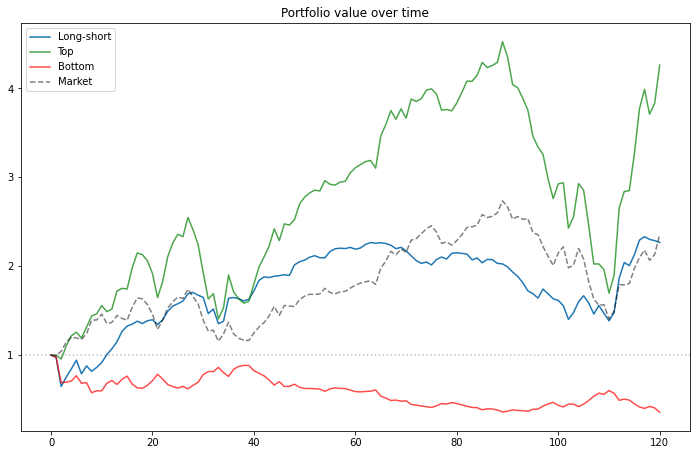

In [11]:
plt.title('Portfolio value over time')
plt.plot(ls_mth_cum_returns, label='Long-short')
plt.plot(be_mth_cum_returns, c='g', alpha=0.7, label='Top')
plt.plot(wo_mth_cum_returns, c='r', alpha=0.7, label='Bottom')
plt.plot(mk_mth_cum_returns, ls='--', c='black', alpha=0.5, label='Market')
plt.axhline(1, ls='dotted', c='gray', alpha=0.5)
plt.legend()
plt.show()

In [12]:
print('Geometric average of monthly geometric returns')
print(f'Market portfolio     : {np.power(mk_mth_cum_returns[-1], 1/len(mk_mth_cum_returns)) - 1:.6f}')
print(f'Long-short portfolio : {np.power(ls_mth_cum_returns[-1], 1/len(ls_mth_cum_returns)) - 1:.6f}')
print(f'Top portfolio        : {np.power(be_mth_cum_returns[-1], 1/len(be_mth_cum_returns)) - 1:.6f}')
print(f'Bottom portfolio     : {np.power(wo_mth_cum_returns[-1], 1/len(wo_mth_cum_returns)) - 1:.6f}')

Geometric average of monthly geometric returns
Market portfolio     : 0.007124
Long-short portfolio : 0.006786
Top portfolio        : 0.012055
Bottom portfolio     : -0.008483


In [13]:
len(mk_mth_cum_returns)

121

In [14]:
len(ls_mth_cum_returns)

121